# **$\bullet$ Ricardo Charris Jiménez**
---

* Cada respuesta debe ser explicada claramente sin dejar espacio a dobles interpretaciones
* El código de la tarea debe estar comentado.
* Está bien discutir las respuestas con compañeros/as. Está bien buscar la respuesta en internet. No está bien entregar código escrito por otras personas ya sea compañeros, código obtenido por internet u otros.
* Todo código entregado debe ser escrito completamente por usted. De lo contrario, su tarea será penalizada con la nota mínima.

# **Problema 1** (4 puntos)
## ***Clasificación*** Implemente 2 modelos y compare

El conjunto de datos contiene registros anonimizados sobre el comportamiento de estudiantes en redes sociales y los resultados relacionados en su vida. Abarca múltiples países y niveles académicos, centrándose en dimensiones clave como la intensidad de uso, las plataformas preferidas y la dinámica de relaciones. Cada fila representa la respuesta de un estudiante a la encuesta.

**Población:** Estudiantes de entre 16 y 25 años matriculados en enseñanza media, programas de pregrado o postgrado.

**Geografía:** Internacional.

**Período:** Datos recopilados mediante una encuesta en línea realizada una sola vez durante el primer trimestre de 2025.

**Diseño de la encuesta:** Preguntas adaptadas de escalas validadas sobre adicción a redes sociales (por ejemplo, Bergen Social Media Addiction Scale) e índices de conflicto en relaciones.

**Reclutamiento:** Participantes reclutados a través de listas de correo universitarias y plataformas de redes sociales, asegurando diversidad en nivel académico y país.

*   Sexo = 0: femenino; 1: masculino
*   Nivel académico = 0: enseñanza media; 1:pregrado; 2:postgrado
*   Score_salud_mental = 1: pobre a 10: excelente
*   Score_adiccion = 1: bajo a 10: alto.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.environ["SCIPY_ARRAY_API"] = "1"

**$\cdot$ Exploración de datos:**

In [274]:
# Exploración de datos (inserte cuantas líneas estime conveniente)
df_adiccion_redes = pd.read_csv("P1_Adiccion-RRSS.csv", sep=";", encoding="latin1")
df_adiccion_redes

,ID,Edad,Sexo,Nivel_academico,Pais,Prom_diario_uso_hrs,Plataforma_fav,Afecta_performance_academico,Hrs_sueo_por_noche,Score_salud_mental,Relaciones,Conflictos_Social_Media,Score_adiccion
0,1,19,0,1,Bangladesh,5.2,Instagram,Si,6.5,6,En relacion,3,8
1,2,22,1,2,India,2.1,Twitter,No,7.5,8,Soltero-a,0,3
2,3,20,0,1,USA,6.0,TikTok,Si,5.0,5,Complicado,4,9
3,4,18,1,0,UK,3.0,YouTube,No,7.0,7,Soltero-a,1,4
4,5,21,1,2,Canada,4.5,Facebook,Si,6.0,6,En relacion,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,0,1,Italy,4.7,TikTok,No,7.2,7,En relacion,2,5
701,702,23,1,2,Russia,6.8,Instagram,Si,5.9,4,Soltero-a,5,9
702,703,21,0,1,China,5.6,WeChat,Si,6.7,6,En relacion,3,7
703,704,24,1,2,Japan,4.3,Twitter,No,7.5,8,Soltero-a,2,4


In [275]:
df_adiccion_redes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            705 non-null    int64  
 1   Edad                          705 non-null    int64  
 2   Sexo                          705 non-null    int64  
 3   Nivel_academico               705 non-null    int64  
 4   Pais                          705 non-null    object 
 5   Prom_diario_uso_hrs           705 non-null    float64
 6   Plataforma_fav                705 non-null    object 
 7   Afecta_performance_academico  705 non-null    object 
 8   Hrs_sueo_por_noche           705 non-null    float64
 9   Score_salud_mental            705 non-null    int64  
 10  Relaciones                    705 non-null    object 
 11  Conflictos_Social_Media       705 non-null    int64  
 12  Score_adiccion                705 non-null    int64  
dtypes: fl

---
Como se puede ver en los datos entregados por el método info(), el dataset esta completo, pues no tiene ningun dato nulo, además, los tipos de variable corresponden a la información descrita por cada variable.

---

In [276]:
df_adiccion_redes.describe()

,ID,Edad,Sexo,Nivel_academico,Prom_diario_uso_hrs,Hrs_sueo_por_noche,Score_salud_mental,Conflictos_Social_Media,Score_adiccion
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,0.499291,1.422695,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,0.500354,0.566635,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,0.000000,0.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,0.000000,1.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,0.000000,1.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,1.000000,2.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,1.000000,2.000000,8.500000,9.600000,9.000000,5.000000,9.000000


---
Dentro de las estadisticas a destacar, estan los quartiles y la media de 'Score_adiccion', donde la media es de 6.4 puntos y la mediana es de 7 puntos, esta variable será usada para crear la etiqueta que indique si la persona es considerada adicta o no adicta. También son importantes las estadísticas de la columna 'Prom_diario_uso_hrs', pues esta indica con que tanta frecuencia usan las redes sociales los estudiantes.

---

In [277]:
df_adiccion_redes.describe(include=["object"])

,Pais,Plataforma_fav,Afecta_performance_academico,Relaciones
count,705,705,705,705
unique,110,12,2,3
top,India,Instagram,Si,Soltero-a
freq,53,249,453,384


---
Se puede ver que  hay una gran cantidad de estudiantes los cuales se ven afectados academicamente por el uso de redes sociales. Las columnas 'Afecta_performance_academico´, 'Plataforma_fav' y 'Relaciones', pueden entregar información importante para los modelos, por lo cual se mapearan a numeros para que puedan ser usadas en el entrenamiento de los modelos, además, se mapearan los atributos sexo y Nivel academico desde su formato numerico a su significado categorico.
*   Sexo = 0: femenino; 1: masculino
*   Nivel académico = 0: enseñanza media; 1:pregrado; 2:postgrado
---

In [278]:
relaciones_i_d = {}
relaciones_d_i = {}
plataforma_fav_i_d = {}
plataforma_fav_d_i = {}
perf_academico_i_d = {}
perf_academico_d_i = {}
sexo_i_d = {0: "femenino", 1:"masculino"}
nivel_academico_i_d = {0: "enseñanza media", 1: "pregrado", 2: "postgrado"}

for i, dato in enumerate(df_adiccion_redes["Afecta_performance_academico"].unique()):
    perf_academico_i_d[i] = dato
    perf_academico_d_i[dato] = i

for i, dato in enumerate(df_adiccion_redes["Plataforma_fav"].unique()):
    plataforma_fav_i_d[i] = dato
    plataforma_fav_d_i[dato] = i

for i, dato in enumerate(df_adiccion_redes["Relaciones"].unique()):
    relaciones_i_d[i] = dato
    relaciones_d_i[dato] = i


---
En base al mapeo realizado se crea una nueva columna para cada una de las 3 columnas mencionadas anteriormente con su valor correspondiente, además, se crea la etiqueta que se usará para los algoritmos de clasificación en base a la columna "score_adiccion", se considero que un puntaje mayor o igual a 8 es suficiente para considerar a la persona adicta a las redes sociales, puesto que 8 equivale al percentil 75.

---

In [279]:
df_adiccion_redes_mod = df_adiccion_redes.copy()
df_adiccion_redes_mod["Plataforma_fav_num"] = df_adiccion_redes_mod["Plataforma_fav"].apply(lambda x: plataforma_fav_d_i[x])
df_adiccion_redes_mod["Afecta_performance_academico_num"] = df_adiccion_redes_mod["Afecta_performance_academico"].apply(lambda x: perf_academico_d_i[x])
df_adiccion_redes_mod["Relaciones_num"] = df_adiccion_redes_mod["Relaciones"].apply(lambda x : relaciones_d_i[x])
df_adiccion_redes_mod["adicto"] = df_adiccion_redes_mod["Score_adiccion"].apply(lambda x : "adicto" if x>=8 else "no adicto")
df_adiccion_redes_mod

,ID,Edad,Sexo,Nivel_academico,Pais,Prom_diario_uso_hrs,Plataforma_fav,Afecta_performance_academico,Hrs_sueo_por_noche,Score_salud_mental,Relaciones,Conflictos_Social_Media,Score_adiccion,Plataforma_fav_num,Afecta_performance_academico_num,Relaciones_num,adicto
0,1,19,0,1,Bangladesh,5.2,Instagram,Si,6.5,6,En relacion,3,8,0,0,0,adicto
1,2,22,1,2,India,2.1,Twitter,No,7.5,8,Soltero-a,0,3,1,1,1,no adicto
2,3,20,0,1,USA,6.0,TikTok,Si,5.0,5,Complicado,4,9,2,0,2,adicto
3,4,18,1,0,UK,3.0,YouTube,No,7.0,7,Soltero-a,1,4,3,1,1,no adicto
4,5,21,1,2,Canada,4.5,Facebook,Si,6.0,6,En relacion,2,7,4,0,0,no adicto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,0,1,Italy,4.7,TikTok,No,7.2,7,En relacion,2,5,2,1,0,no adicto
701,702,23,1,2,Russia,6.8,Instagram,Si,5.9,4,Soltero-a,5,9,0,0,1,adicto
702,703,21,0,1,China,5.6,WeChat,Si,6.7,6,En relacion,3,7,11,0,0,no adicto
703,704,24,1,2,Japan,4.3,Twitter,No,7.5,8,Soltero-a,2,4,1,1,1,no adicto


# Modelos de clasificación

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionamos unicamente las columnas númericas del dataframe
columnas = [col for col in df_adiccion_redes_mod.columns if col not in ["ID", "Pais", "Plataforma_fav", "Afecta_performance_academico", "Relaciones", "adicto"]]
x = df_adiccion_redes_mod[columnas]
x


,Edad,Sexo,Nivel_academico,Prom_diario_uso_hrs,Hrs_sueo_por_noche,Score_salud_mental,Conflictos_Social_Media,Score_adiccion,Plataforma_fav_num,Afecta_performance_academico_num,Relaciones_num
0,19,0,1,5.2,6.5,6,3,8,0,0,0
1,22,1,2,2.1,7.5,8,0,3,1,1,1
2,20,0,1,6.0,5.0,5,4,9,2,0,2
3,18,1,0,3.0,7.0,7,1,4,3,1,1
4,21,1,2,4.5,6.0,6,2,7,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
700,20,0,1,4.7,7.2,7,2,5,2,1,0
701,23,1,2,6.8,5.9,4,5,9,0,0,1
702,21,0,1,5.6,6.7,6,3,7,11,0,0
703,24,1,2,4.3,7.5,8,2,4,1,1,1


---
En la casilla anterior se obtuvieron las columnas que se usan en el entrenamiento del modelo, corresponden a las columnas con datos númericos exceptuando a la columna 'Score_adiccion', puesto que a partir de esta se etiqueto a los estudiantes, por lo tanto, está columna implica la condición de adicción a las redes sociales de los estudiantes.

---

In [281]:
# Seleccionamos el target
y = df_adiccion_redes_mod["adicto"]

scaler = StandardScaler()

# Se separan los datos en conjuntos de entrenamiento y de prueba
x_train_con_score, x_test_con_score, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Eliminamos la columna que entrega el puntaje de adicción ya que entrega información directa sobre el nivel de adicción de los estudiantes
if ("Score_adiccion" in columnas):
    columnas.remove("Score_adiccion")
x_train = x_train_con_score[columnas]
x_test = x_test_con_score[columnas]

# Se llevan los datos a una distribucion normal
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

---
se obtienen las etiquetas calculadas previamente, desde la columna 'adicto', en el dataset, para cada uno de los estudiantes. 
Se separa el dataset en datos de entrenamiento y datos de prueba, luego, se normalizan los datos.

---

## Modelo de clasificación 1: K-means

In [282]:
# Implemente modelo de clasificación 1:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_normalized, y_train)

KNeighborsClassifier()

Se entrena un modelo de machine learning utilizando el método KNN, y los datos de entrenamiento y etiquetas antes calculadas.

## Modelo de clasificación 2: Random forest

In [283]:
# Implemente modelo de clasificación 2:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

Se entrena un modelo de machine learning utilizando el método Random Forest, y los datos de entrenamiento y etiquetas antes calculadas.

## Análisis de métricas de comparación:

In [284]:
# Comparativa y evaluación de modelos
from sklearn.metrics import classification_report, confusion_matrix

# funcion que clasifica a los estudiantes dados por el conjunto de datos de prueba mediante el modelo entregado y entrega metricas del rendimiento del algoritmo.
def evaluar_modelo(modelo, x_test, y_test):
    y_pred = modelo.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=df_adiccion_redes_mod["adicto"].unique()))
    return y_pred


# Evalua el rendimiento del modelo KNN
print("Metricas de evaluación para KNN:\n")
y_pred_knn = evaluar_modelo(knn, x_test_normalized, y_test)

# Evalua el rendimiento del modelo Random Forest
print("Metricas de evaluación para Random Forest:\n")
y_pred_rf = evaluar_modelo(rf, x_test, y_test)

Metricas de evaluación para KNN:

              precision    recall  f1-score   support

      adicto       0.98      1.00      0.99        40
   no adicto       1.00      0.99      1.00       101

    accuracy                           0.99       141
   macro avg       0.99      1.00      0.99       141
weighted avg       0.99      0.99      0.99       141

Metricas de evaluación para Random Forest:

              precision    recall  f1-score   support

      adicto       1.00      1.00      1.00        40
   no adicto       1.00      1.00      1.00       101

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



---
## Conclusiones:
- KNN:
    - Se puede ver que el modelo predijo algunos pocos estudiantes como adictos que no eran adictos.
    - En general obtuvo un muy buen rendimiento, ya que el accuracy es de 99%, aunque hay que considerar que hay un poco de desbalance en las clases.
- Random Forest:
    - Se puede ver que el modelo realizo una predicción 100% precisa para todos los ejemplos entregados, por lo tanto, el modelo está muy bien hecho.

---


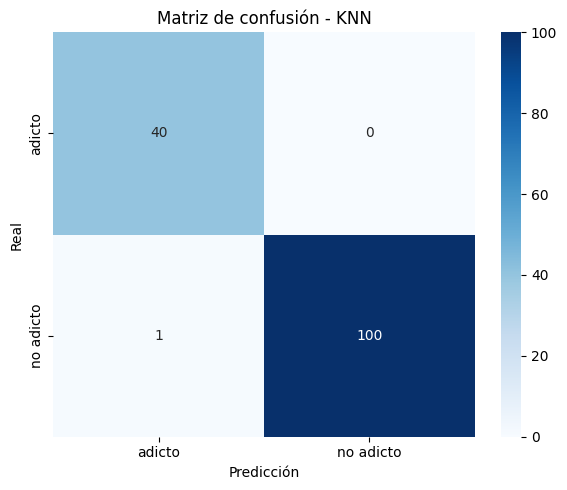

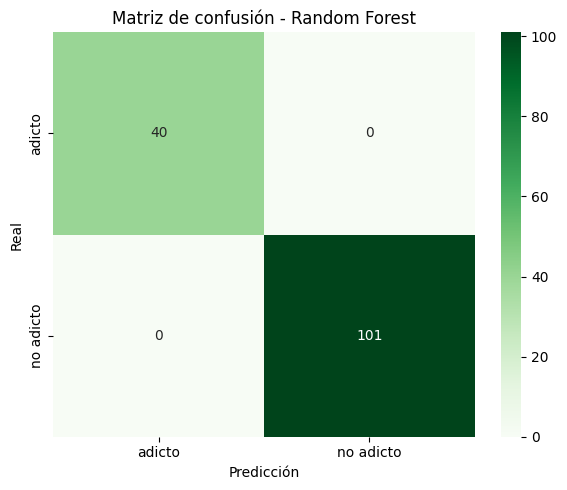

In [285]:
# funcion para generar y graficar la matriz de confusion para las predicciones de un modelo
def graficar_matriz_confusion(y_test, y_pred, titulo, colores):
    plt.figure(figsize=(6,5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap=colores,
        xticklabels=df_adiccion_redes_mod["adicto"].unique(),
        yticklabels=df_adiccion_redes_mod["adicto"].unique(),
    )
    plt.title(titulo)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# Crea y genera los graficos de las matrices de confusion para los algoritmos KNN y Random Forest
titulo_cm_knn = "Matriz de confusión - KNN"
graficar_matriz_confusion(y_test, y_pred_knn, titulo_cm_knn,"Blues")

titulo_cm_rf = "Matriz de confusión - Random Forest"
graficar_matriz_confusion(y_test, y_pred_rf, titulo_cm_rf, "Greens")

---
**Además:**

*   Realice una optimización de los modelos en caso de ser necesario. ¿Qué configuración logra el mejor desempeño?
*   Analice el balance de clases en el conjunto de entrenamiento. Si hay desbalance, aplique técnicas para mejorar en caso de ser necesario. ¿Cuál técnica mejora el desempeño general del modelo? Justifica con métricas y gráficos.
*   Explicar las predicciones individuales del modelo. Elija tres estudiantes del conjunto de test y explique por qué fueron clasificados como "adictos" o "no adictos" (por ejemplo).
*   Realice visualizaciones que estén relacionadas con sus comentarios y permita explorar la relación entre horas de sueño, uso diario y nivel de adicción predicho por el modelo.

---



# Optimización de los algoritmos

In [286]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=5))
score_knn = cross_val_score(pipe, x, y, scoring="f1_macro")

pipe = make_pipeline(scaler, RandomForestClassifier(random_state=42))
score_rf = cross_val_score(pipe, x, y, scoring="f1_macro")

print(f"Random Forest: f1_score mean = {score_rf.mean()}")
print(f"KNN: f1_score mean = {score_knn.mean()}")

Random Forest: f1_score mean = 1.0
KNN: f1_score mean = 0.9330203960531591


- A pesar de que Random Forest entrego una precisión del 100% al realizar la evaluación con el conjunto de prueba definido, al realizar validación cruzada se obtuvo un f1_score de 0.973..., por lo tanto se intentara mejorar este puntaje a travez de la optimización de parametros.
- Ya que KNN obtuvo un f1_score de 0.903..., hay una buena brecha para obtener mejoras al optimizar el algoritmo.

---

## Optimización KNN

In [287]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# pipe = Pipeline([
#     ("scaler", scaler),
#     ("knn", KNeighborsClassifier(n_jobs=-1))
# ])

# knn_params = {
#     "knn__n_neighbors": [3, 5, 7, 9],
#     "knn__weights": ["uniform", "distance"],
#     "knn__p": [1, 2, 3, 4, 5],
#     "knn__algorithm": ["ball_tree", "kd_tree", "brute"]
# }

# grid_knn = GridSearchCV(pipe, knn_params, cv=5, scoring="f1_macro")
# grid_knn.fit(x_train, y_train)

# print(f"Mejores parametros: {grid_knn.best_params_}")

---
## Optimización Random Forest

In [288]:
# rf_params = {
#     "n_estimators": [100, 200, 500, 1000],
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "max_features": ["sqrt", "log2"]
# }

# grid_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42), rf_params, cv=5, scoring="f1_macro")
# grid_rf.fit(x_train, y_train)

# print(f"Mejores parametros: {grid_rf.best_params_}")


---

Para no tener que ejecutar la optimización de parametros cada vez que se abre el notebook, se guarda el diccionario en un archivo json.

In [289]:
# import json

# knn_params = grid_knn.best_params_.copy()
# keys = list(knn_params.keys())

# for key in keys:
#     knn_params[key[5:]] = knn_params.pop(key)

# rf_params = grid_rf.best_params_
# rf_params["random_state"] = 42

# with open("parametrosKNN.json", "w") as f:
#     json.dump(knn_params, f)

# with open("parametrosRF.json", "w") as f:
#     json.dump(rf_params, f)

In [290]:
import json

with open("parametrosKNN.json", "r") as f:
    knn_params = json.load(f)

with open("parametrosRF.json", "r") as f:
    rf_params = json.load(f)

Usando Grid Search se lograron encontrar los parametros que entregan mejores resultados en base a la métrica f1_macro_score, estos parametros serán utilizados para el resto de pruebas de los modelos.

Cabe destacar que los parametros encontrados para random_forest son los parametros que vienen por default con el constructor de la clase.

A continuación se muestra la comparación entre los rendimiento de los algoritmos optimizados y no optimizados.

In [291]:
pipe = make_pipeline(scaler, KNeighborsClassifier(**knn_params))
score_knn_optimized = cross_val_score(pipe, x, y, scoring="f1_macro")

pipe = make_pipeline(scaler, RandomForestClassifier(**rf_params))
score_rf_optimized = cross_val_score(pipe, x, y, scoring="f1_macro")

print(f"KNN: f1_score = {score_knn.mean()}")
print(f"KNN_optimized: f1_score = {score_knn_optimized.mean()}")
print(f"Random Forest: f1_score = {score_rf.mean()}")
print(f"Random Forest optimized: f1_score = {score_rf_optimized.mean()}")

KNN: f1_score = 0.9330203960531591
KNN_optimized: f1_score = 0.9741973099805538
Random Forest: f1_score = 1.0
Random Forest optimized: f1_score = 1.0


Se puede ver claramente que el algoritmo KNN logro una mejora notable con la optimización de parametros, en cambio el algoritmo Random Forest no sufrio ningun cambio puesto que los parametros son los mismos.

---

# Analisis del balance de clases

In [292]:
n_adictos = y_train[y_train == "adicto"].count()
n_no_adictos = y_train[y_train == "no adicto"].count()
print(f"Cantidad de estudiantes adictos: {n_adictos}"
      f"\nCantidad de estudiantes no adictos: {n_no_adictos}"
      f"\nPorcentaje de estudiantes adictos: {n_adictos/y_train.count()*100}%")

Cantidad de estudiantes adictos: 159
Cantidad de estudiantes no adictos: 405
Porcentaje de estudiantes adictos: 28.191489361702125%


---
En el analisis anterior se puede ver que las clases del conjunto de entrenamiento están desbalanceadas, por lo tanto, a continuación se aplicaran 3 tecnicas diferentes para ver cual tiene mejor rendimiento:

- La primera de ellas corresponde a cambiar los pesos de las clases en base a la presencia relativa de cada clase. 
- La segunda corresponde a usar oversampling mediante SMOTE, estrategia que genera nuevos ejemplos para la clase minoritaria mediante interpolacion de puntos.
- La última consiste en aplicar undersampling, lo cual se basa en reducir la cantidad de muestras para las clases más frecuentes y homogeneizar las cantidades.

Para comparar el rendimiento de cada modelo se realizará validacion cruzada y se compararan los rendimientos en base al f1_score_macro.

---

## Balanceo de clases: Cambio de pesos

Dado que KNN es un algoritmo basado en distancias y no en optimización como Random Forest, el cambio de pesos no es aplicable para KNN, en el caso de Random Forest, el parametro 'class_weight="balanced"', crea un algoritmo que asigna pesos igual al inverso de la presencia relativa de cada clase en el dataset.

In [293]:
weighted_rf_params = rf_params
weighted_rf_params["class_weight"] = "balanced"

weighted_rf = RandomForestClassifier(**weighted_rf_params)
pipe = make_pipeline(scaler, weighted_rf)
score_weighted_rf = cross_val_score(pipe, x, y, scoring='f1_macro')
print(f"Weighted Random Forest: f1_score mean = {score_weighted_rf.mean()}")

Weighted Random Forest: f1_score mean = 1.0


---
## Balanceo de clases: Oversampling (SMOTE)

## KNN

In [294]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

knn_smote = KNeighborsClassifier(**knn_params)
pipe = Pipeline([
    ("smote", SMOTE()),
    ("scaler", scaler),
    ("knn", knn_smote)
])
score_smote_knn = cross_val_score(pipe, x, y, scoring="f1_macro")
print(f"Smote KNN: f1_score mean = {score_smote_knn.mean()}")

Smote KNN: f1_score mean = 0.9745046523302827


## Random Forest

In [295]:
rf_smote = RandomForestClassifier(**rf_params)
pipe = Pipeline([
    ("smote", SMOTE()),
    ("scaler", scaler),
    ("rf", rf_smote)
])
score_smote_rf = cross_val_score(pipe, x, y, scoring="f1_macro")
print(f"Smote Random Forest: f1_score mean = {score_smote_rf.mean()}")

Smote Random Forest: f1_score mean = 1.0


---

## Balanceo de clases: Undersampling


## KNN

In [296]:
from imblearn.under_sampling import RandomUnderSampler

knn_undersampling = KNeighborsClassifier(**knn_params)
pipe = Pipeline([
    ("under", RandomUnderSampler()),
    ("scaler", scaler),
    ("knn", knn_undersampling)
])
score_under_knn = cross_val_score(pipe, x, y, scoring="f1_macro")
print(f"Undersampling KNN: f1_score mean = {score_under_knn.mean()}")

Undersampling KNN: f1_score mean = 0.9732102585258525


## Random Forest

In [297]:
rf_undersampling = RandomForestClassifier(**rf_params)
pipe = Pipeline([
    ("under", RandomUnderSampler()),
    ("scaler", scaler),
    ("rf", rf_undersampling)
])
score_under_rf = cross_val_score(pipe, x, y, scoring="f1_macro")
print(f"Undersampling Random Forest: f1_score mean = {score_under_rf.mean()}")

Undersampling Random Forest: f1_score mean = 1.0


---
## Resumen de resultados del balanceo de clases

In [298]:
print(f"Random Forest: f1_score mean = {score_rf.mean()}")
print(f"Weighted Random Forest: f1_score mean = {score_weighted_rf.mean()}")
print(f"Smote Random Forest: f1_score mean = {score_smote_rf.mean()}")
print(f"Undersampling Random Forest: f1_score mean = {score_under_rf.mean()}")
print(f"KNN: f1_score mean = {score_knn.mean()}")
print(f"Smote KNN: f1_score mean = {score_smote_knn.mean()}")
print(f"Undersampling KNN: f1_score mean = {score_under_knn.mean()}")


Random Forest: f1_score mean = 1.0
Weighted Random Forest: f1_score mean = 1.0
Smote Random Forest: f1_score mean = 1.0
Undersampling Random Forest: f1_score mean = 1.0
KNN: f1_score mean = 0.9330203960531591
Smote KNN: f1_score mean = 0.9745046523302827
Undersampling KNN: f1_score mean = 0.9732102585258525


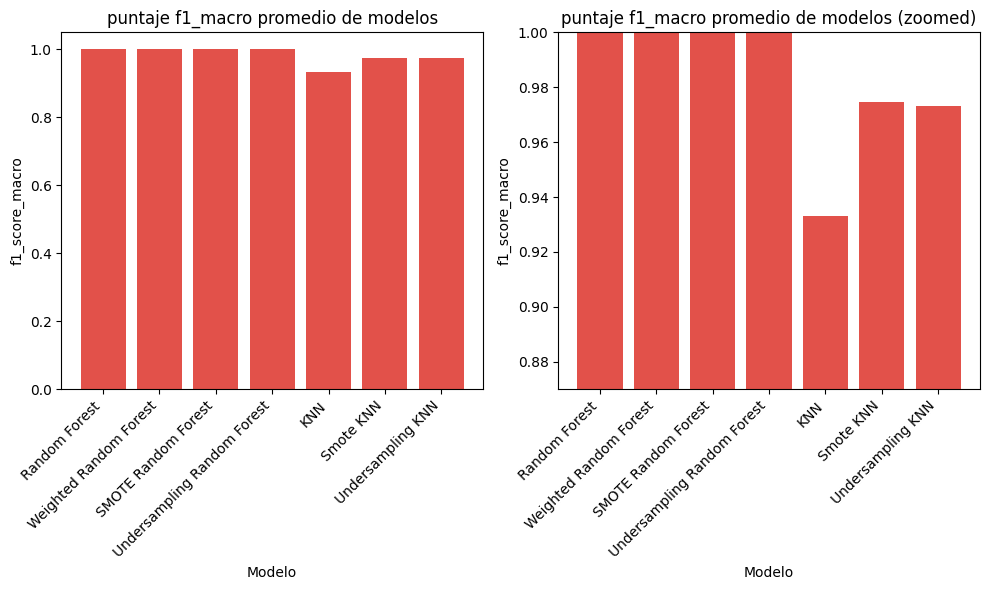

In [299]:
models = ["Random Forest", "Weighted Random Forest", "SMOTE Random Forest", "Undersampling Random Forest", "KNN", "Smote KNN", "Undersampling KNN"]
f1 = [score_rf.mean(), score_weighted_rf.mean(), score_smote_rf.mean(), score_under_rf.mean(), score_knn.mean(), score_smote_knn.mean(), score_under_knn.mean()]

fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].bar(models, f1)
axes[0].set_title("puntaje f1_macro promedio de modelos")
axes[0].set_xlabel("Modelo")
axes[0].set_ylabel("f1_score_macro")
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=45, ha="right")

axes[1].bar(models, f1)
axes[1].set_title("puntaje f1_macro promedio de modelos (zoomed)")
axes[1].set_xlabel("Modelo")
axes[1].set_ylabel("f1_score_macro")
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=45, ha="right")
axes[1].set_ylim(0.87, 1)
plt.tight_layout()
plt.show()

- En base a los resultados obtenidos se puede ver que, para este problema, Random Forest es un mejor modelo en comparación a KNN, puesto que independientemente del método usado para balancear las clases, logro un mejor f1_score en todas sus variantes.
- Dentro de las variaciones de Random Forest, no se ve una diferencia significativa en los modelos, sin embargo, el que obtuvo el puntaje más alto fue weighted_random_forest, por lo tanto este será usado en la optimización.
- Dentro de las variaciones de KNN, también hay una diferencia mínima entre los modelos, aunque un poco mayor que con Random Forest, para este caso se escoge el modelo SMOTE KNN para ser optimizado.

Métricas de evaluación para Random Forest Optimized
              precision    recall  f1-score   support

      adicto       1.00      1.00      1.00        40
   no adicto       1.00      1.00      1.00       101

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

Métricas de evaluación para KNN Optimized
              precision    recall  f1-score   support

      adicto       1.00      1.00      1.00        40
   no adicto       1.00      1.00      1.00       101

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



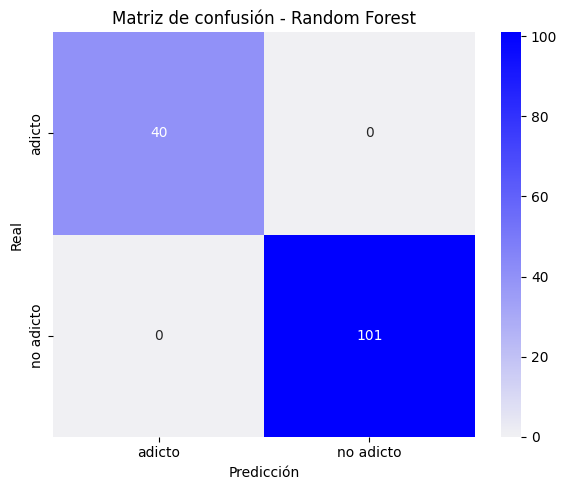

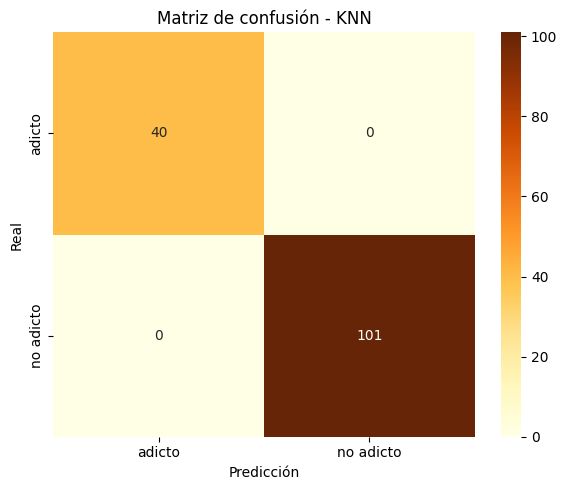

In [300]:
rf_optimized = RandomForestClassifier(**rf_params)
rf_optimized.fit(x_train, y_train)
print("Métricas de evaluación para Random Forest Optimized")
y_pred_rf_optimized = evaluar_modelo(rf_optimized, x_test, y_test)

optimum_knn = KNeighborsClassifier(**knn_params)
optimum_knn.fit(x_train_normalized, y_train)
print("Métricas de evaluación para KNN Optimized")
y_pred_knn_optimized = evaluar_modelo(optimum_knn, x_test_normalized, y_test)

graficar_matriz_confusion(y_test, y_pred_rf_optimized, titulo_cm_rf, sns.color_palette("light:b", as_cmap=True))
graficar_matriz_confusion( y_test, y_pred_knn_optimized,titulo_cm_knn, sns.color_palette("YlOrBr", as_cmap=True))



En los graficos mostrados se puede ver que despues de la optimización el modelo KNN perfecciono la clasificación de los estudiantes, logrando así un 100% de precision.

---

# Fundamento de la clasificación de los estudiantes

## Selección de estudiantes

Dado que ambos modelos obtuvieron una precisión del 100% con los datos de test, ambos predijeron las mismas clases, por lo tanto, el analisis realizado se hará sobre la predicción de uno de los modelos, la cual es equivalente para el otro.

A continuación se obtienen los datos de los estudiantes correspondientes al conjunto de testing y a las variables numericas que correspondan se les asigna la categoria indicada por su valor númerico. 

In [301]:
df_test = x_test_con_score.copy()
df_test["adicto"] = y_pred_rf_optimized.copy()

df_test["Plataforma_fav"] = df_test["Plataforma_fav_num"].apply(lambda x : plataforma_fav_i_d[x])
df_test["Afecta_performance_academico"] = df_test["Afecta_performance_academico_num"].apply(lambda x : perf_academico_i_d[x])
df_test["Relaciones"] = df_test["Relaciones_num"].apply(lambda x : relaciones_i_d[x])
df_test["Nivel_academico_cat"] = df_test["Nivel_academico"].apply(lambda x : nivel_academico_i_d[x])
df_test["Sexo_cat"] = df_test["Sexo"].apply(lambda x : sexo_i_d[x])

df_test.drop(["Plataforma_fav_num", "Sexo", "Nivel_academico", "Relaciones_num", "Afecta_performance_academico_num"], axis=1, inplace=True)
df_test


,Edad,Prom_diario_uso_hrs,Hrs_sueo_por_noche,Score_salud_mental,Conflictos_Social_Media,Score_adiccion,adicto,Plataforma_fav,Afecta_performance_academico,Relaciones,Nivel_academico_cat,Sexo_cat
687,22,6.3,6.2,5,4,8,adicto,TikTok,Si,Soltero-a,postgrado,masculino
287,22,3.5,8.0,8,1,4,no adicto,Facebook,No,En relacion,postgrado,masculino
442,20,3.7,8.2,7,3,6,no adicto,TikTok,Si,Soltero-a,pregrado,femenino
611,19,6.5,6.1,5,4,8,adicto,Facebook,Si,Soltero-a,pregrado,masculino
58,19,4.6,5.9,6,3,7,no adicto,Instagram,Si,Complicado,pregrado,masculino
...,...,...,...,...,...,...,...,...,...,...,...,...
581,24,4.9,7.3,7,2,5,no adicto,Facebook,No,En relacion,postgrado,masculino
188,19,4.7,7.9,7,2,5,no adicto,Facebook,No,Soltero-a,pregrado,femenino
497,21,7.3,4.9,6,3,7,no adicto,WhatsApp,Si,Soltero-a,postgrado,masculino
393,21,6.5,5.8,5,4,8,adicto,WhatsApp,Si,En relacion,postgrado,masculino


In [302]:
estudiante1 = df_test.iloc[3].copy()
estudiante2 = df_test.iloc[30].copy()
estudiante3 = df_test.iloc[95].copy()
class_estudiante1 = df_test.iloc[3]["adicto"]
class_estudiante2 = df_test.iloc[30]["adicto"]
class_estudiante3 = df_test.iloc[95]["adicto"]
print(f"Clasificación estudiante 1: {class_estudiante1}")
print(f"Clasificación estudiante 2: {class_estudiante2}")
print(f"Clasificación estudiante 3: {class_estudiante3}")

Clasificación estudiante 1: adicto
Clasificación estudiante 2: no adicto
Clasificación estudiante 3: adicto


---
Creo que los principales factores a considerar por el modelo, son el promedio diario de uso en horas, las horas de sueño en promedio, el puntaje de salud mental, que tan conflictivos son en las redes sociales y si afecta su desempeño academico. Estos parametros están directamente asociados a la adicción a las redes sociales o son consecuencia directa de la adicción a las redes.

---

In [303]:
estudiante1

Edad                                   19
Prom_diario_uso_hrs                   6.5
Hrs_sueo_por_noche                   6.1
Score_salud_mental                      5
Conflictos_Social_Media                 4
Score_adiccion                          8
adicto                             adicto
Plataforma_fav                   Facebook
Afecta_performance_academico           Si
Relaciones                      Soltero-a
Nivel_academico_cat              pregrado
Sexo_cat                        masculino
Name: 611, dtype: object

---
- El estudiante duerme un total de 6.1 horas por día, lo cual es una cantidad muy baja para lo recomendado (7 a 9 horas), lño que puede indicar que se acueste muy tarde por estar pegado en las redes sociales.
- Promedio de uso diario en horas es de 6.5, considerando que duerme 6 horas al día aproximadamente, pasa 6 de las 18 horas restantes en las redes sociales, es decir un 33% del tiempo restante de su día.
- su puntaje de salud mental es un 5, es decir, no es muy malo pero tampoco es bueno, sin embargo, lo normal sería que una persona tuviera un buen estado de salud mental.
- El estudiante indica que las redes sociales si afectan su desempeño academico, lo cual es un claro sintoma de adicción.

En general, creo que el estudiante fue clasificado como adicto, debido a que pasa un gran tiempo del día en las redes, su salud mental no está en un buen estado y el uso de estas afecta su desempeño academico.

---

In [304]:
estudiante2

Edad                                     22
Prom_diario_uso_hrs                     4.6
Hrs_sueo_por_noche                     7.5
Score_salud_mental                        7
Conflictos_Social_Media                   2
Score_adiccion                            5
adicto                            no adicto
Plataforma_fav                    VKontakte
Afecta_performance_academico             No
Relaciones                      En relacion
Nivel_academico_cat               postgrado
Sexo_cat                          masculino
Name: 251, dtype: object

---
- El estudiante duerme un total de 7.5 horas por día, lo que está dentro del rango recomendado de sueño.
- En promedio gasta 4.6 horas de su día en las redes sociales, considerando las horas que destina a dormir, equivaldría a un 28% del tiempo restante del día.
- Su puntaje de salud mental es un 7, lo cual es bueno mas no es muy alto, se podría mejorar, sin embargo, quiere decir que está estable.
- El estudiante indica que el uso de redes sociales no afecta su desempeño academico, lo cual es un aspecto importante a considerar, ya que quiere decir que el tiempo que destina a redes sociales no perjudica el desempeño en sus responsabilidades.

En resumen, creo que el estudiante no fue considerado adicto puesto que tiene buenos habitos de salud como dormir las horas correspondientes, tiene una buena salud mental y el uso de redes no afecta a su desempeño academico.

---

In [305]:
estudiante3

Edad                                     20
Prom_diario_uso_hrs                     7.2
Hrs_sueo_por_noche                     5.1
Score_salud_mental                        5
Conflictos_Social_Media                   4
Score_adiccion                            9
adicto                               adicto
Plataforma_fav                       TikTok
Afecta_performance_academico             Si
Relaciones                      En relacion
Nivel_academico_cat                pregrado
Sexo_cat                           femenino
Name: 366, dtype: object

---
- El estudiante duerme un total de 5.1 horas diarias, lo cual es muy bajo, mucho más que el estudiante 1.
- En promedio el estudiante destina 7.2 horas de su día a las redes sociales, es decir, un 38% del tiempo restante de su día a las redes sociales.
- Su puntaje de salud mental es de 5 puntos, equivalente al estudiante 1.
- Finalmente, el estudiante indica que el uso de redes sociales si afecta su desempeño academico, claro signo de adicción.

En conclusión, el estudiante fue considerado como adicto debido a los malos habitos que posee, como dormir muy pocas horas diarias, además, tener una mala salud mental y dejar que el uso de redes afecte su desempeño academico.

---

C:\Users\rica1\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


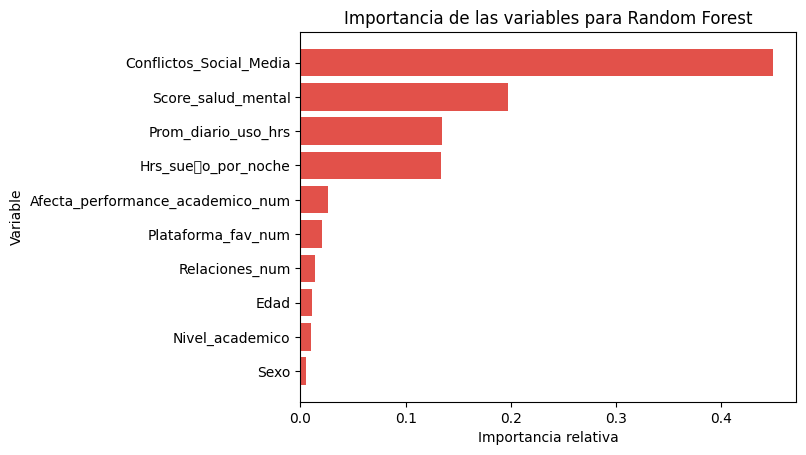

In [306]:
importancia = rf_optimized.feature_importances_
nombres_columnas = x.columns.copy()
nombres_columnas = nombres_columnas.drop("Score_adiccion")

df_importancia_caracteristicas = pd.DataFrame({
    'Caracteristica': nombres_columnas,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=True)

plt.barh(df_importancia_caracteristicas["Caracteristica"], df_importancia_caracteristicas["Importancia"])
plt.title("Importancia de las variables para Random Forest")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.show()

---
Como se puede comprobar en el grafico de las variables más importantes para Random Forest, el puntaje de salud mental, el promedio de uso diario de redes sociales y las horas de sueño son características muy importantes para la toma de decisión del modelo, sin embargo, hay una característica que el modelo considero mucho más importante, característica que yo no tuve en cuenta, y son los conflictos en las redes sociales, variable que tiene más de un 40% de relevancia estadistica en el modelo y que es clave para su toma de decisiones.

Gracias a este grafico se puede determinar que hay 4 características clave para determinar si un estudiante es adicto o no.

---

# Graficos

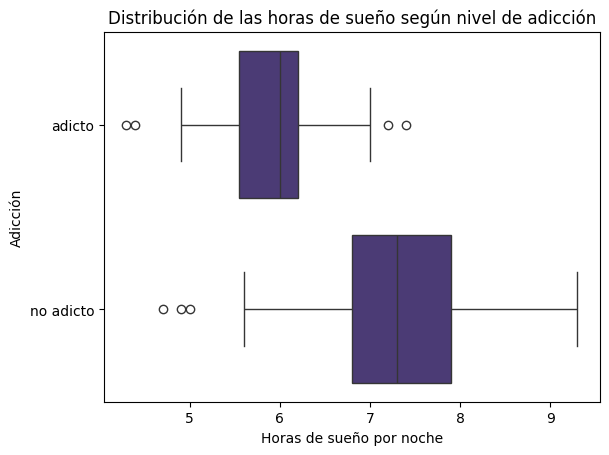

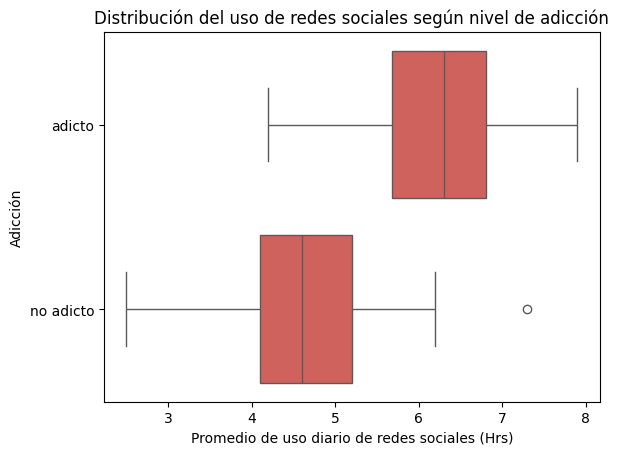

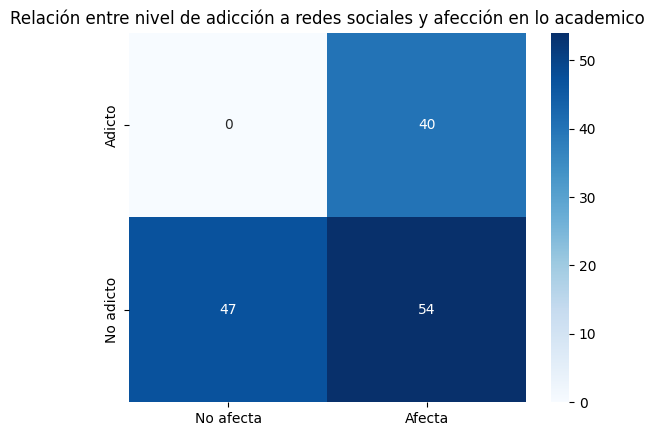

In [307]:
sns.set_palette("viridis")
sns.boxplot(x="Hrs_sueo_por_noche", y="adicto", data=df_test)
plt.title("Distribución de las horas de sueño según nivel de adicción")
plt.xlabel("Horas de sueño por noche")
plt.ylabel("Adicción")
plt.show()

sns.set_palette("Spectral")
sns.boxplot(x="Prom_diario_uso_hrs", y="adicto", data=df_test)
plt.title("Distribución del uso de redes sociales según nivel de adicción")
plt.xlabel("Promedio de uso diario de redes sociales (Hrs)")
plt.ylabel("Adicción")
plt.show()

n_adictos_test = df_test.loc[df_test["adicto"] == "adicto", ["Afecta_performance_academico"]]
n_adictos_afectados = int(n_adictos_test[n_adictos_test["Afecta_performance_academico"] == "Si"].count().iloc[0])
n_adictos_no_afectados = int(n_adictos_test.count().iloc[0]) - n_adictos_afectados

n_no_adictos_test = df_test.loc[df_test["adicto"] == "no adicto", ["Afecta_performance_academico"]]
n_no_adictos_afectados = int(n_no_adictos_test[n_no_adictos_test["Afecta_performance_academico"] == "Si"].count().iloc[0])
n_no_adictos_no_afectados = int(n_no_adictos_test.count().iloc[0]) - n_no_adictos_afectados

data = [[n_adictos_no_afectados, n_adictos_afectados], [n_no_adictos_no_afectados, n_no_adictos_afectados]]
df_data = pd.DataFrame(data, columns=["No_afectados_academicamente", "Afectados_academicamente"])
x_labels = ["No afecta", "Afecta"]
y_labels = ["Adicto", "No adicto"]
sns.heatmap(df_data, annot=True, cmap="Blues", xticklabels=x_labels, yticklabels=y_labels)
plt.title("Relación entre nivel de adicción a redes sociales y afección en lo academico")
plt.show()


---
Se puede notar claramente que hay una relación entre las horas de sueño y el uso de redes sociales en la condición de adicción de los estudiantes, en general, puesto que hay ciertos outliers, si el estudiante duerme las horas que le corresponden cada día tiende a no ser adicto a las redes sociales, en cambio, con menos horas pasa lo contario. La relación es inversa con respecto al uso promedio en horas de redes sociales, puesto que los estudiantes adictos tienden a pasar más horas en redes sociales.

En cuanto al Heatmap, se puede notar que los estudiantes que su desempeño academico no se ve afectado por las redes sociales se clasifician inmediatamente como no adictos, sin embargo, la relación es más ambigua para los estudiantes que no se ven afectados academicamente.

---

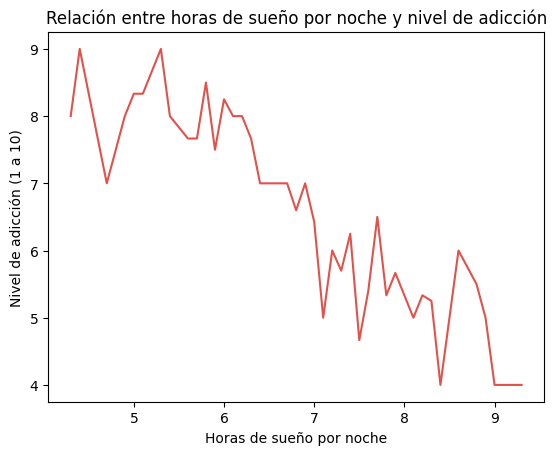

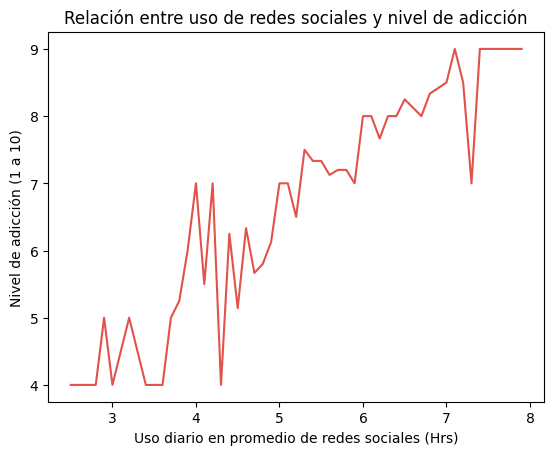

In [308]:
sns.lineplot(x="Hrs_sueo_por_noche", y="Score_adiccion", data=df_test, errorbar=None)
plt.title("Relación entre horas de sueño por noche y nivel de adicción")
plt.xlabel("Horas de sueño por noche")
plt.ylabel("Nivel de adicción (1 a 10)")
plt.show()

sns.lineplot(x="Prom_diario_uso_hrs", y="Score_adiccion", data=df_test, errorbar=None)
plt.title("Relación entre uso de redes sociales y nivel de adicción")
plt.xlabel("Uso diario en promedio de redes sociales (Hrs)")
plt.ylabel("Nivel de adicción (1 a 10)")
plt.show()

---
Decidí hacer un grafico de lineas en base al score de adicción para mostrar una relación lineal y más clara entre las variables de estudio, los graficos creados demuestran más claramente las conclusiones obtenidas anteriormente.

---

# **Problema 2**
## ***Reducción de dimensionalidad***

## **$\bullet$ Pregunta 1 (2.0 Puntos)**

Usted deberá comparar dos algoritmos de reducción de dimensionalidad. El primero es Principal component analysis (PCA), el segundo queda a su elección.

### **$\cdot$ Pregunta 1.1 **

Explique en sus palabras el funcionamiento de cada algoritmo de forma detallada. Esto es: explicar su funcionamiento, sus principales parámetros, sus limitaciones y sus ventajas por sobre otros algoritmos similares.

In [309]:
df_spotify = pd.read_csv("P2_Spotify.csv", sep=";", index_col="id")
df_spotify

,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,explicit,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,,,,,,,,,,,
0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,08-03-24,228639,False,...,0.646,5,-8.334,1,0.0427,0.0615,3.04e-05,0.0740,0.295,115.842
1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,08-03-24,173639,True,...,0.630,7,-5.854,0,0.0434,0.157,0.0,0.0732,0.447,97.998
2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,08-03-24,92400,True,...,0.362,10,-9.480,1,0.0416,0.67,0.0,0.1760,0.385,84.726
3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),20-03-20,191013,False,...,0.825,0,-4.645,1,0.0325,0.0215,2.44e-05,0.0936,0.593,118.091
4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,08-03-24,214994,True,...,0.775,1,-6.614,1,0.0548,0.19,6.54e-05,0.1130,0.787,118.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,69,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,Roses,Speakerboxxx/The Love Below,2003,369573,True,...,0.708,0,-5.653,1,0.0545,0.0482,1.85e-05,0.1070,0.509,108.970
996,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,64,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,Rosa Parks,Aquemini,29-09-98,324373,True,...,0.701,6,-7.198,0,0.2830,0.105,0.0,0.7610,0.251,103.890
997,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,60,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,B.O.B. - Bombs Over Baghdad,Stankonia,31-10-00,304226,True,...,0.978,9,-5.324,1,0.0978,0.0555,4.11e-05,0.0260,0.653,153.809


In [310]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist_name        1000 non-null   object 
 1   genres             837 non-null    object 
 2   followers          1000 non-null   int64  
 3   artist_popularity  1000 non-null   int64  
 4   artist_url         1000 non-null   object 
 5   track_name         1000 non-null   object 
 6   album_name         1000 non-null   object 
 7   release_date       1000 non-null   object 
 8   duration_ms        1000 non-null   int64  
 9   explicit           1000 non-null   bool   
 10  track_popularity   1000 non-null   int64  
 11  danceability       1000 non-null   float64
 12  energy             1000 non-null   float64
 13  key                1000 non-null   int64  
 14  loudness           1000 non-null   float64
 15  mode               1000 non-null   int64  
 16  speechiness        1000 non-nu

In [311]:
df_spotify.describe(include=("object"))

,artist_name,genres,artist_url,track_name,album_name,release_date,acousticness,instrumentalness
count,1000,837,1000,1000,1000,1000,1000,1000
unique,92,80,118,984,608,481,770,520
top,A,pop,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Closer,Best Of Debabrata Biswas - Vol - 2,01-01-05,0.257,0.0
freq,106,40,10,2,9,13,5,440


---
Debido a que hay ciertas variables categoricas que pueden ser importantes, estás serán mapeadas a un formato númerico, por otro lado, ya que la columna track_name tiene muy pocas muestras unicas, se omitira el uso de esta columna para el clustering.

---

In [312]:
artist_d_i = {}
artist_i_d = {}
genres_d_i = {}
genres_i_d = {}
url_d_i = {}
url_i_d = {}
album_d_i = {}
album_i_d = {}
release_d_i = {}
release_i_d = {}
acoustic_d_i = {}
acoustic_i_d = {}
instrumental_d_i = {}
instrumental_i_d = {}

for i, artist in enumerate(df_spotify["artist_name"].unique()):
    artist_d_i[artist] = i
    artist_i_d[i] = artist

for i, genre in enumerate(df_spotify["genres"].unique()):
    genres_d_i[genre] = i
    genres_i_d[i] = genre

for i, url in enumerate(df_spotify["artist_url"].unique()):
    url_d_i[url] = i
    url_i_d[i] = url

for i, album in enumerate(df_spotify["album_name"].unique()):
    album_d_i[album] = i
    album_i_d[i] = album

for i, date in enumerate(df_spotify["release_date"].unique()):
    release_d_i[date] = i
    release_i_d[i] = date

for i, acc in enumerate(df_spotify["acousticness"].unique()):
    acoustic_d_i[acc] = i
    acoustic_i_d[i] = acc

for i, inst in enumerate(df_spotify["instrumentalness"].unique()):
    instrumental_d_i[inst] = i
    instrumental_i_d[i] = inst

df_spotify_mod = df_spotify.copy()

df_spotify_mod["artist_name_num"] = df_spotify_mod["artist_name"].apply(lambda x : artist_d_i[x])
df_spotify_mod["genres_num"] = df_spotify_mod["genres"].apply(lambda x : genres_d_i[x])
df_spotify_mod["artist_url_num"] = df_spotify_mod["artist_url"].apply(lambda x : url_d_i[x])
df_spotify_mod["album_name_num"] = df_spotify_mod["album_name"].apply(lambda x : album_d_i[x])
df_spotify_mod["release_date_num"] = df_spotify_mod["release_date"].apply(lambda x : release_d_i[x])


df_spotify_mod.drop(["artist_name", "genres", "artist_url", "track_name","album_name", "release_date", "acousticness", "instrumentalness"], axis=1, inplace=True)
df_spotify_mod

,followers,artist_popularity,duration_ms,explicit,track_popularity,danceability,energy,key,loudness,mode,speechiness,liveness,valence,tempo,artist_name_num,genres_num,artist_url_num,album_name_num,release_date_num
id,,,,,,,,,,,,,,,,,,,
0,98934105,89,228639,False,89,0.645,0.646,5,-8.334,1,0.0427,0.0740,0.295,115.842,0,0,0,0,0
1,98934105,85,173639,True,85,0.795,0.630,7,-5.854,0,0.0434,0.0732,0.447,97.998,0,0,0,0,0
2,98934105,83,92400,True,83,0.506,0.362,10,-9.480,1,0.0416,0.1760,0.385,84.726,0,0,0,0,0
3,98934105,80,191013,False,80,0.650,0.825,0,-4.645,1,0.0325,0.0936,0.593,118.091,0,0,0,1,1
4,98934105,79,214994,True,79,0.787,0.775,1,-6.614,1,0.0548,0.1130,0.787,118.998,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2769972,69,369573,True,69,0.751,0.708,0,-5.653,1,0.0545,0.1070,0.509,108.970,91,80,117,603,288
996,2769972,64,324373,True,64,0.792,0.701,6,-7.198,0,0.2830,0.7610,0.251,103.890,91,80,117,606,479
997,2769972,60,304226,True,60,0.746,0.978,9,-5.324,1,0.0978,0.0260,0.653,153.809,91,80,117,604,478


---
**$\cdot$ Algoritmo 1:** *PCA*
PCA, principal component analisis, es una tecnica de reducción de dimensionalidad lineal, se basa en reducir la mayor cantidad de dimensiones (columnas) de los datos conservando la mayor cantidad de información, representada como la varianza.

PCA encuentra combinaciones lineales de las variables, direcciones ortogonales, que expliquen la mayor cantidad de varianza en los datos. Para esto, calcula una matriz de covarianza de las variables, calcula los eigenvectores (direcciones) de la matriz, luego los ordena según sus eigenvalores, conservando las n componentes principales (eigenvectores) que expliquen la mayor cantidad de varianza, y finalmente proyecta los datos sobre estas n componentes principales escogidas.

En cuanto a los parametros que se pueden usar para optimizar PCA encontramos los siguientes:
- n_components, número de componentes principales a conservar, puede tomar distintos valores:
    - None, conserva todas las componentes principales.
    - Entero, número de componentes a conservar.
    - Float, número entre 0 y 1, equivale a la proporción de la varianza a conservar.
    - "mle", usa MLE (Máximum Likelihood Estimation) para elegir automáticamente el número de componentes a conservar.
- svd_solver, algoritmo para calcular la descomposición SVD, en scikit-learn moderno en vez de usar una matriz de covarianza y el calculo de eigenvectores y eigenvalores, se usa la descomposición SVD porque es más estable númericamente y más eficiente.
    - "full", usa la SVD clásica.
    - "arpack", usa descomposición parcial, útil para muchos datos y pocos componentes.
    - "randomized", valor para fijar la aleatoriedad.
    - "auto", elige el mejor según los datos y el n_components
- random_state, valor para fijar la aleatoriedad.

En cuanto a las limitaciones del algoritmo PCA tenemos las siguientes:
- Solo encuentra relaciones lineales.
- Es dificil analizar los componentes principales ya que están dados por las combinaciones lineales de las columnas.
- Requiere que las variables estén en la misma escala, por eso se normalizan los datos.

En cuanto a las ventajas del algoritmo tenemos las siguientes:
- Es un algoritmo simple y rápido para la reducción de dimensionalidad.
- Ayuda a eliminar ruido al descartar dimensiones con poca varianza.
- Ayuda a obtener una visualización 2D o 3D de los datos.

---

In [331]:
from sklearn.decomposition import PCA
x_spotify_scaled = scaler.fit_transform(df_spotify_mod)

pca = PCA(random_state=42)
x_pca = pca.fit_transform(x_spotify_scaled)
varianzas_explicadas = pca.explained_variance_ratio_

print("Varianza acumulada de las componentes principales:")
for var in np.cumsum(varianzas_explicadas):
    print(f"{var:.2f}", end= "  ")

Varianza acumulada de las componentes principales:
0.25  0.38  0.47  0.56  0.62  0.68  0.73  0.78  0.83  0.87  0.91  0.94  0.96  0.98  0.99  1.00  1.00  1.00  1.00  

**$\cdot$ Algoritmo 2:** *Isomap*
Isomap, Isometric Mapping, es una técnica de reducción de dimensionalidad no lineal, basada en la idea de preservar las distancias geodésicas entre los puntos de los datos. A diferencia de PCA, que solo encuentra relaciones lineales, Isomap puede capturar relaciones no lineales presentes en estructuras más complejas de los datos.

En cuanto a los parámetros que se pueden ajustar para optimizar Isomap encontramos los siguientes:

- n_components, número de dimensiones a conservar tras la reducción.
- n_neighbors, número de vecinos cercanos a considerar al construir el grafo de conectividad.
- metric, tipo de distancia para calcular entre puntos.
    - "minkowski" 
    - "manhattan"
    - "cosine"
    
- path_method, algoritmo usado para calcular los caminos más cortos en el grafo.
    - "auto"
    - "FW" (Floyd-Warshall)
    - "D" (Dijkstra).

- eigen_solver, método para calcular los eigenvectores en la última fase del algoritmo.
    - "auto"
    - "arpack"
    - "dense"

En cuanto a las limitaciones del algoritmo Isomap tenemos las siguientes:
- Es sensible al ruido y a la elección de n_neighbors, ya que una mala construcción del grafo puede distorsionar las distancias geodésicas.
- No permite reconstrucción del espacio original desde el espacio reducido.
- Es computacionalmente más costoso que PCA, especialmente para grandes conjuntos de datos.

En cuanto a las ventajas del algoritmo tenemos las siguientes:

- Es capaz de capturar estructuras no lineales, lo cual lo hace útil en problemas donde PCA no es suficiente.
- Conserva la estructura global del conjunto de datos mejor que otras técnicas no lineales como t-SNE.
- Permite una mejor representación visual de datos que tienen forma de variedades complejas, como superficies curvas o espirales.

In [314]:
from sklearn.manifold import Isomap

dimensiones = [2,3,4,5,6,7,8,9,10]
errores = []

for dim in dimensiones:
    isomap = Isomap(n_neighbors=4, n_components=dim)
    isomap.fit_transform(x_spotify_scaled)
    errores.append(isomap.reconstruction_error())

print(f"Error en la reconstrucción:")
for e in errores:
    print(f"{e:.2f}", end="   ")

Error en la reconstrucción:
40.92   30.69   23.90   21.77   20.52   19.59   18.97   18.39   17.93   

### **$\cdot$ Pregunta 1.2 **

A modo preliminar de visualización, reduzca la dimensión de los datos a D=4 utilizando ambos algoritmos. Luego realice un gráfico de estos datos reducidos. Compare los resultados obtenidos con el algoritmo [t-SNE](https://scikit-learn.org/dev/auto_examples/manifold/plot_t_sne_perplexity.html).

¿Qué algoritmo funciona mejor para visualizar los datos?

¿Por qué ocurre esto?

c:\Users\rica1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


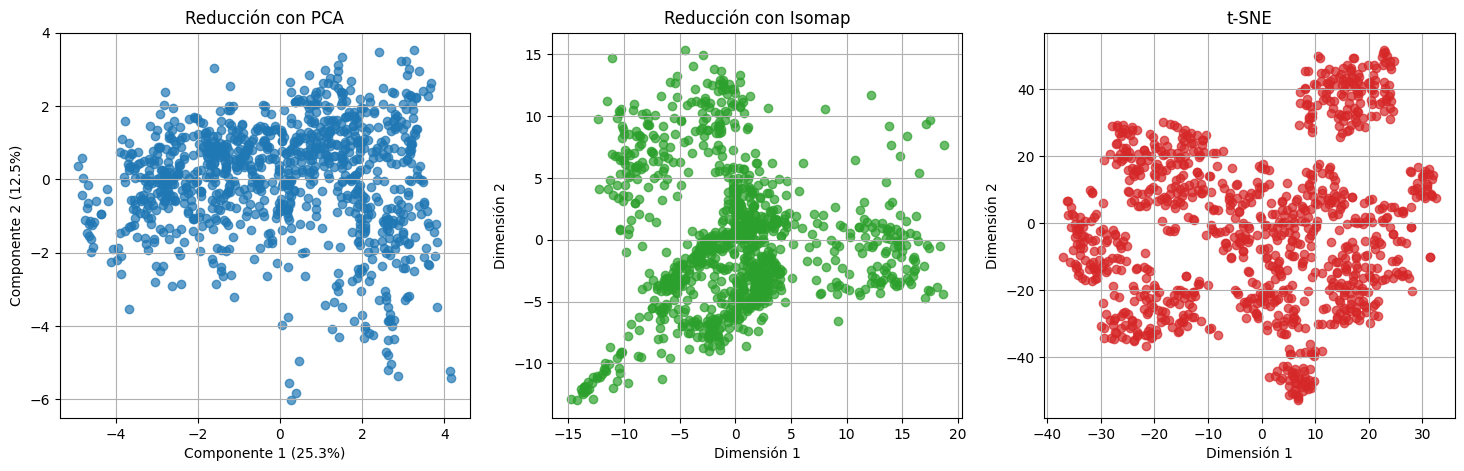

In [332]:
from sklearn.manifold import TSNE # Para graficar utilice esta implemntación de t-SNE

fig, axes = plt.subplots(1, 3, figsize=(18,5))

pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_spotify_scaled)

isomap = Isomap(n_neighbors=4, n_components=5)
x_isomap = isomap.fit_transform(x_spotify_scaled)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
x_tsne = tsne.fit_transform(x_spotify_scaled)

axes[0].scatter(x_pca[:, 0], x_pca[:, 1], c='tab:blue', alpha=0.7)
axes[0].set_title("Reducción con PCA")
axes[0].set_xlabel(f"Componente 1 ({100*pca.explained_variance_ratio_[0]:.1f}%)")
axes[0].set_ylabel(f"Componente 2 ({100*pca.explained_variance_ratio_[1]:.1f}%)")
axes[0].grid(True)

axes[1].scatter(x_isomap[:, 0], x_isomap[:, 1], c='tab:green', alpha=0.7)
axes[1].set_title("Reducción con Isomap")
axes[1].set_xlabel("Dimensión 1")
axes[1].set_ylabel("Dimensión 2")
axes[1].grid(True)

axes[2].scatter(x_tsne[:, 0], x_tsne[:, 1], c='tab:red', alpha=0.7)
axes[2].set_title("t-SNE")
axes[2].set_xlabel("Dimensión 1")
axes[2].set_ylabel("Dimensión 2")
axes[2].grid(True)

---
Para visualizar los datos funciona mejor t-SNE, puesto que muestra las diferencias entre clusters con mayor claridad, esto se debe a que es un algoritmo especializado para mostrar datos en 2 o 3 dimensiones, en cambio, el algoritmo PCA se basa en calcular la varianza global bajo relaciones lineales, por lo tanto no captura relaciones no lineales ni estructuras de clusters, finalmente, Isomap si captura relaciones no lineales pero es suceptible al ruido y la complejidad en los datos, puesto que los vecinos elegidos para cada punto pueden no ser los vecinos reales en la estructura original, al reducir dimensiones se puede generar confusión en las distancias calculadas.

Como se puede ver en los graficos, tanto PCA como Isomap muestran un gran cluster mayoritario en la distribución de los datos, en cambio, en t-SNE se pueden ver algunos grupos más densos.

---

# **$\bullet$ Pregunta 2

¿Cuantas dimensiones son suficientes para representar mis datos?

En este item usted debe **justificar** bajo algún criterio la elección de la dimensión elegida para representar el conjunto de imágenes. Realice esto para ambos algoritmos seleccionados previamente y decida cual algortimo funciona mejor.

> **Observación: La elección de la dimension reducida y algoritmo sin justificación no obtendrán puntaje.**

## PCA

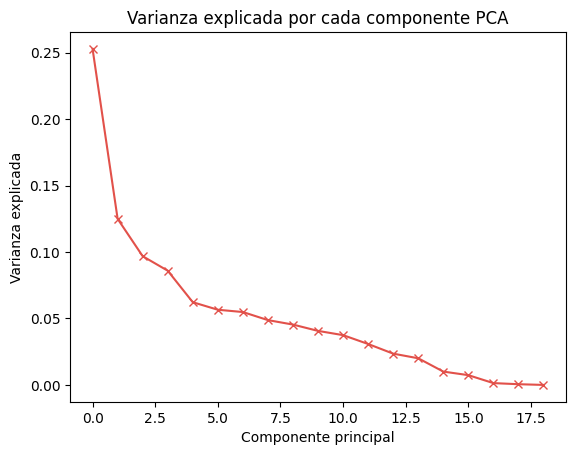

Varianza acumulada de las componentes principales:
0.25  0.38  0.47  0.56  0.62  0.68  0.73  0.78  0.83  0.87  0.91  0.94  0.96  0.98  0.99  1.00  1.00  1.00  1.00  

In [333]:
plt.plot(varianzas_explicadas, marker="x")
plt.title("Varianza explicada por cada componente PCA")
plt.xlabel("Componente principal")
plt.ylabel("Varianza explicada")
plt.show()

print("Varianza acumulada de las componentes principales:")
for var in np.cumsum(varianzas_explicadas):
    print(f"{var:.2f}", end= "  ")

---
Como se puede ver en el grafico de la varianza explicada por las componentes principales, y usando el método del codo, sería bueno conservar 5 componentes principales, sin embargo, como se ve en la lista de varianza acumulada, esas 5 componentes principales explicarían unicamente el 62% de la variación de los datos, por lo cual no serían muy representativas.

---

## Isomap

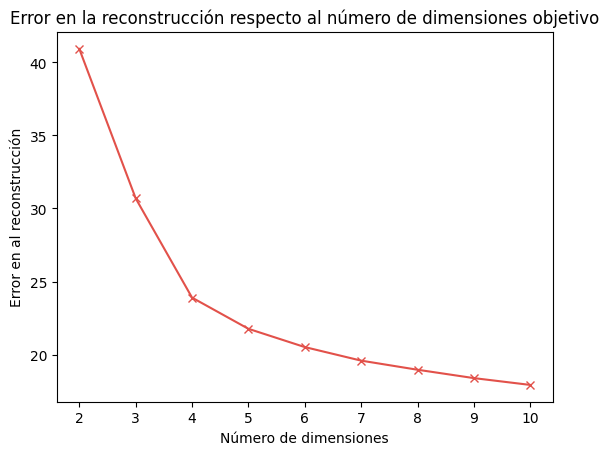

Error en la reconstrucción:
40.92   30.69   23.90   21.77   20.52   19.59   18.97   18.39   17.93   

In [334]:
plt.plot(dimensiones, errores, marker="x")
plt.title("Error en la reconstrucción respecto al número de dimensiones objetivo")
plt.ylabel("Error en al reconstrucción")
plt.xlabel("Número de dimensiones")
plt.show()

print(f"Error en la reconstrucción:")
for e in errores:
    print(f"{e:.2f}", end="   ")

---
Para determinar cuantas dimensiones entregaban un mejor resultado para el algoritmo Isomap se realizo un ciclo for para todas las dimensiones de 1 a 10, en el cual se obtiene el error de reconstrucción, número que representa que tan bien las representación de baja dimensión conserva las distancias originales entre los datos, en el grafico se puede notar que a partir de las 5 dimensiones el error empieza a disminuir mucho más lento, menos de 1 unidad, por lo tanto una dimension 5 se considera buena para trabajar con el modelo, puesto que posterior a esa el error baja poco y no se pretende aumentar la complejidad del modelo por esa poca precisión obtenida.

---

# **$\bullet$ Clustering (2.0 puntos)**
---
En este ítem usted debe utilizar el dataset con dimensionalidad reducida visto en la pregunta anterior y aplicar un algoritmo de clustering de su elección. Para obtener todo el puntaje usted debe realizar los siguientes puntos

*   Utilice alguna métrica para evaluar cuantos clusters definen correctamente su conjunto de datos (La métrica a utilizar depende del tipo de algortimo de clustering, pero las más tipicas son: *Inercia*, *Silhouette*, $BIC-AIC$, entre otros). Justifique cual es el mejor número de clusters que representan a los datos.
*   Compare diferentes variantes de su mismo algoritmo (esto puede ser a nivel de hiperparámetros, o distintas versiones de este mismo y vea cual funciona mejor comparando su métrica y tiempo total en computación.
*   Analice los resultados en función de cómo se organizaron los cluster, ¿qué relación tienen los datos? Ej: en el cluster 1 se agrupan los datos con características XXXXXXXX; en el cluster 2 se observan los datos YYYYYY, etc.


# Clusterin con MeanShift

In [335]:
from sklearn.cluster import MeanShift

from sklearn.metrics import silhouette_score

msf = MeanShift()
msf.fit(x_pca)

MsfLabels = msf.labels_
if (len(set(MsfLabels)) == 1):
    print("Se encontró un único cluster")
else:
    MsfScore = silhouette_score(x_pca, MsfLabels)
    print(f"Silhouette Score: {MsfScore:.3f}")

Se encontró un único cluster


---
Al ejecutar MeanShift con el dataset reducido mediante Isomap, este encontro un unico cluster, por lo tanto, fue necesario ejecutarlo con el dataset reducido mediante PCA, el cual también retorno un único cluster.

---

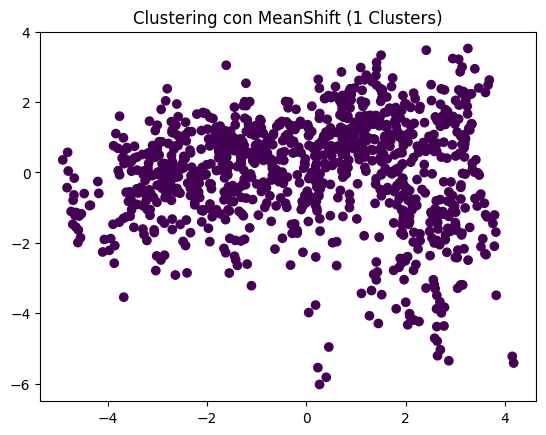

In [337]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=MsfLabels, cmap='viridis',)
plt.title(f"Clustering con MeanShift ({len(set(MsfLabels))} Clusters)")
plt.show()

# Clustering con KMeans

In [338]:
from sklearn.cluster import KMeans

clusters = range(2, 10)

for n in clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    KMLabels = kmeans.fit_predict(x_isomap)
    KMScore = silhouette_score(x_isomap, KMLabels)
    print(f"Número de clusters: {n} | Puntaje silhouette: {KMScore}")


Número de clusters: 2 | Puntaje silhouette: 0.21335011535553935
Número de clusters: 3 | Puntaje silhouette: 0.2458569682614651
Número de clusters: 4 | Puntaje silhouette: 0.3097855849065769
Número de clusters: 5 | Puntaje silhouette: 0.3540402115698946
Número de clusters: 6 | Puntaje silhouette: 0.353501240931193
Número de clusters: 7 | Puntaje silhouette: 0.35972884265271043
Número de clusters: 8 | Puntaje silhouette: 0.3566849376477255
Número de clusters: 9 | Puntaje silhouette: 0.3779076298348841


In [340]:
kmeans = KMeans(n_clusters=9, random_state=42)
KMLabels = kmeans.fit_predict(x_isomap)
KMScore = silhouette_score(x_isomap, KMLabels)

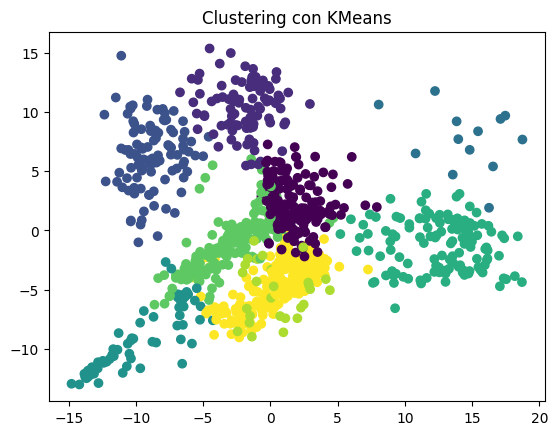

In [341]:
plt.scatter(x_isomap[:, 0],x_isomap[:, 1], c=KMLabels, cmap='viridis')
plt.title("Clustering con KMeans")
plt.show()

---
Dado que MeanShift genero un único cluster y los clusters generados por KMeans evaluados según el coeficiente de silhouette, se puede notar que KMeans realizó un mejor trabajo, obteniendo una puntuación de 0.378 con 9 clusters.

---

In [342]:
clusters = range(2, 12)
max = 0
n_clusters = 0
rdst = 0
algoritmo = ""
algoritmos = ["elkan", "lloyd"]

for n in clusters:
    for k in range(1, 50):
            for a in algoritmos:
                kmeans = KMeans(n_clusters=n, random_state=k, algorithm=a)
                KMLabels = kmeans.fit_predict(x_isomap)
                KMScore = silhouette_score(x_isomap, KMLabels)
                if KMScore > max:
                    max = KMScore
                    n_clusters = n
                    rdst = k
                    algoritmo = a

print(f"Número de clusters: {n_clusters} | random_state: {rdst} | algoritmo: {a} | score: {max}")

Número de clusters: 9 | random_state: 32 | algoritmo: lloyd | score: 0.38330185138514755


---
En el script de arriba se probaron multiples combinaciones de los parametros de Kmeans, dando como resultado que la mejor combinación de parametros supera al obtenido anteriormente, aunque muy ligeramente, consiguiendo un puntaje de silhouette de 0.383 puntos.

---

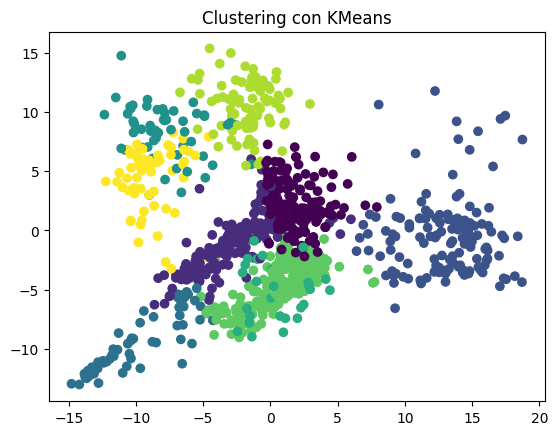

In [344]:
kmeans = KMeans(n_clusters=9, random_state=32, algorithm="lloyd")
KMLabels = kmeans.fit_predict(x_isomap)
KMScore = silhouette_score(x_isomap, KMLabels)

plt.scatter(x_isomap[:, 0],x_isomap[:, 1], c=KMLabels, cmap='viridis')
plt.title("Clustering con KMeans")
plt.show()

In [346]:
df_spotify_isomap = pd.DataFrame(x_isomap)
df_spotify_isomap["kmeans_cluster"] = KMLabels

print("Medias por cluster (KMeans):")
print(df_spotify_isomap.groupby('kmeans_cluster').mean())

Medias por cluster (KMeans):
                        0          1         2         3         4
kmeans_cluster                                                    
0                1.916388   2.188083  7.840520 -0.621857 -2.282740
1               -2.526221  -0.884721 -1.344581  5.983024 -1.004425
2               12.997429  -0.373997 -6.342390 -0.037413  0.107384
3               -9.790217  -9.329685 -3.256780 -2.338669 -1.579483
4               -7.847470   8.325424 -4.838302  1.559618  2.223471
5                0.422237  -5.156502  9.723849  5.290685  9.984997
6                0.578932  -4.519830  1.116722 -2.606041  0.516729
7               -1.728257  10.519523  0.613916 -2.361129  0.934864
8               -8.771761   4.337320 -4.816868 -5.761317  0.959717


---
En la matriz generada con la celda anterior, se puede ver el valor medio de los puntos pertenecientes a cada uno de los 9 clusters (filas) en las 4 dimensiones obtenidas con Isomap (columnas), se puede ver que el cluster 0 se ve caracterizado por un bajo valor en la componente 0 y valores parecidos en la componente 2 t 4, por otro lado, el cluster 4 se ve caracterizado por un alto valor en la componente 0, y valores cercanos a 0 en las componentes 1 y 3, el cluster 7 posee predominancia en la componente 1 en comparación con los otros clusters, y el resto de componentes cercanas a 0. el cluster 2 es aquel que tiene los valores en las componentes más cercanos a 0, se caracteriza por una homogeneidad en todas sus componentes.

En general, se puede identificar dominancia de algunos clusters en ciertas componentes, que los diferencian claramente de los otros, cada uno de estos clusters tiene un patrón de comportamiento único, dado que graficamente se mostraron solo 2 dimensiones, no es posible identificar graficamente la separación de los clusters en su totalidad, sin embargo, se puede notar una notable diferencia en algunos grupos.

---